In [1]:
from svm_margin_plot import plot_svm_boundary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

Вопросы:

**Как понять, какой метод из нелинейного ядра лучше. По метрикам классификации, а какой когда важнее Recall или Precision**?

In [2]:
df = pd.read_csv('mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


**ЗАДАЧА КЛАССИФИКАЦИИ**

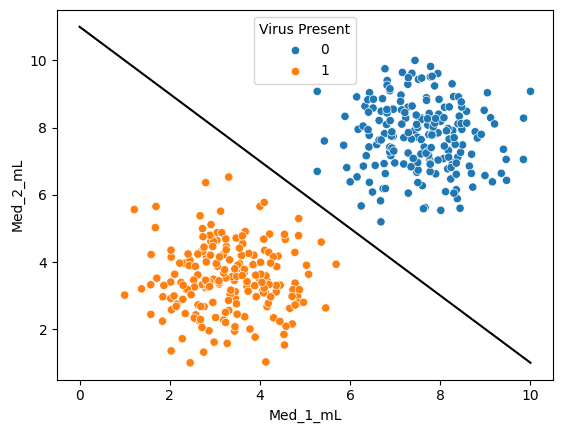

In [3]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')

# провели сами гиперплоскость
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b

plt.plot(x, y, 'black')

In [4]:
from sklearn.svm import SVC

In [5]:
X = df.drop('Virus Present', axis=1)

In [6]:
y = df['Virus Present']

In [7]:
model = SVC(kernel='linear',C=1000)

In [8]:
model.fit(X,y) # сделали исключение и обучили на всех данных

SVC(C=1000, kernel='linear')

c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


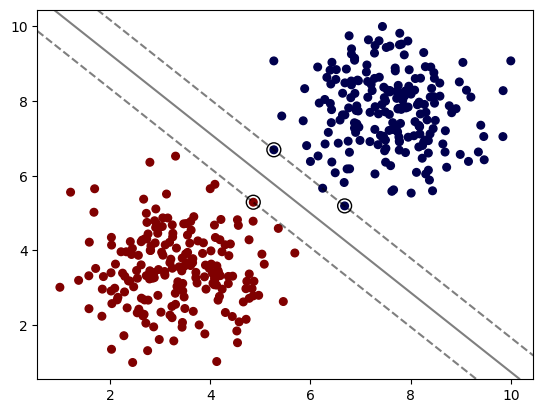

In [9]:
plot_svm_boundary(model, X, y)

c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


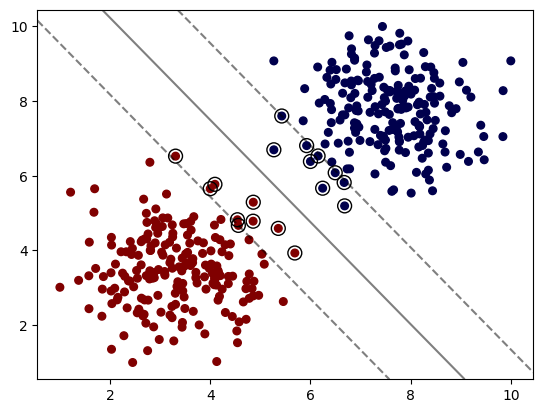

In [10]:
# уменьшая С, допускаем большое число точек в зазор
model = SVC(kernel='linear',C=0.05)
model.fit(X,y) # сделали исключение и обучили на всех данных
plot_svm_boundary(model, X, y)

Параметр gamma в Support Vector Machines (SVM) нужен, чтобы контролировать влияние отдельных обучающих примеров на границу принятия решения. 

c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


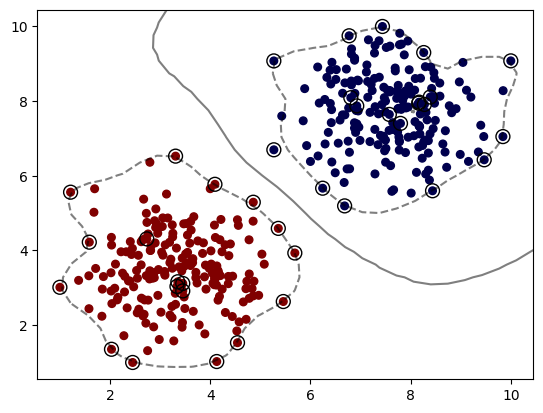

In [11]:
# radial basis function. Преобразование данных в пространство большей размерности
# Гиперплоскость более сложной формы. Надежда на более точную кластеризацию
model = SVC(kernel='rbf',C=1, gamma='auto') # gamma - auto - поышаем чувствительность к шумам
# gamma - scale - хороший баланс между смещением и дисперсией
model.fit(X,y) # сделали исключение и обучили на всех данных
plot_svm_boundary(model, X, y)

c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


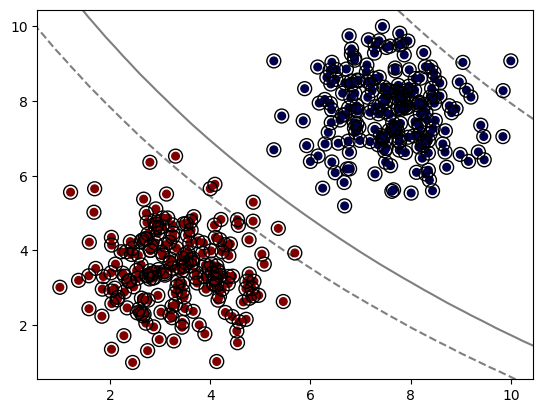

In [12]:
# сигмоид
# здесь работает плохо
# можно перебирать различные методы, чтобы понять что лучше кластеризаует данные
model = SVC(kernel='sigmoid') 
model.fit(X,y)
plot_svm_boundary(model, X, y)

c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


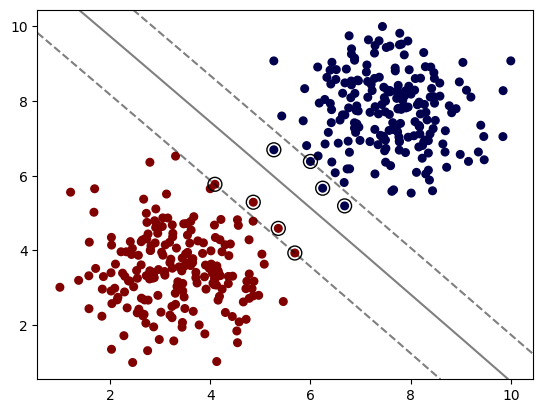

In [13]:
# Полиномиальное ядро (degree)
model = SVC(kernel='poly', C=0.01, degree = 3)
model.fit(X,y)
plot_svm_boundary(model, X, y)

In [14]:
# поиск по сетке для опорных векторов 

In [15]:
svm = SVC()

In [16]:
param_grid = {'C':[0.01, 0.1, 1],'kernel': ['linear', 'rbf']}

In [17]:
grid = GridSearchCV(svm, param_grid=param_grid)

In [18]:
grid.fit(X,y) # нужно разбиение, делаем только для визуализации

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [19]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

**ЗАДАЧА РЕГРЕССИИ**

Стоится гиперплоскость по исходным данным. Затем для нового значения признака X предсказывается значение целевой переменной Y.

In [20]:
df = pd.read_csv('cement_slump.csv')
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


<Axes: >

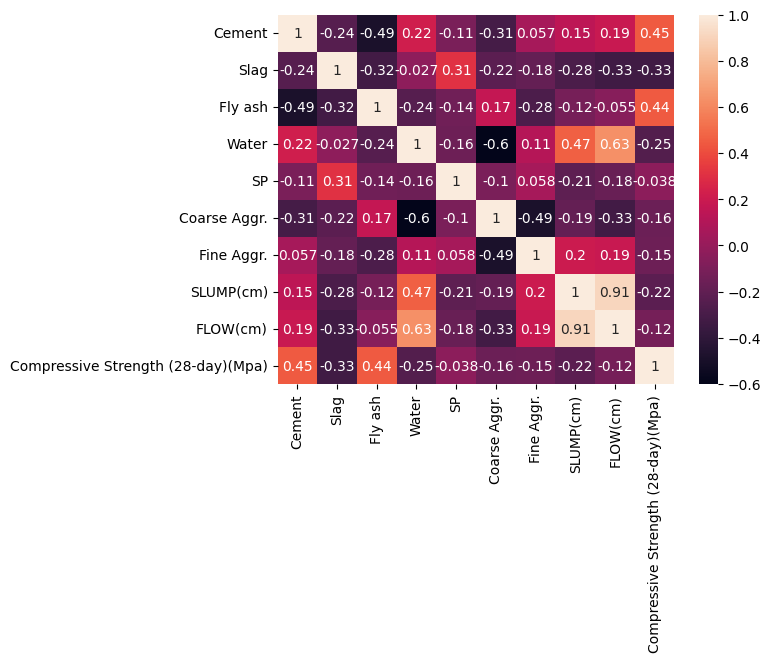

In [21]:
sns.heatmap(df.corr(), annot = True)

In [22]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [23]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [24]:
y = df['Compressive Strength (28-day)(Mpa)']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaled_X_train = scaler.fit_transform(X_train)

In [30]:
scaled_X_test = scaler.transform(X_test)

In [31]:
from sklearn.svm import SVR, LinearSVR

In [32]:
base_model  = SVR()

In [33]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [34]:
base_preds = base_model.predict(scaled_X_test)
base_preds

array([33.54538508, 36.88488329, 35.31862535, 34.4982983 , 38.78862684,
       37.28692733, 34.70488018, 37.45383093, 38.5643203 , 40.60987705,
       36.12704821, 33.47125341, 33.80688776, 35.57395401, 39.06389895,
       39.20405978, 38.73343751, 36.38267762, 32.54415537, 34.41850278,
       37.08595015, 35.95245982, 35.172924  , 32.85268464, 38.10884757,
       36.35378576, 34.496466  , 33.01047764, 36.06717968, 35.99982788,
       34.58986779])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(y_test, base_preds)

5.236902091259178

In [37]:
np.sqrt(mean_squared_error(y_test, base_preds))

np.float64(6.695914838327133)

In [38]:
y_test.mean() # вопрос о том, допустима ошибка для такого среднего, зависит от нас и от предметной области

np.float64(36.26870967741935)

In [39]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [40]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [41]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [42]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [43]:
grid_preds = grid.predict(scaled_X_test)

In [44]:
print(mean_absolute_error(y_test,grid_preds))
print(np.sqrt(mean_squared_error(y_test,grid_preds)))

2.5128012210762365
3.178210305119858
